In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
#Importing train and test dataset
train_df = pd.read_excel("DS_ML Coding Challenge Dataset.xlsx",sheet_name='Training Dataset') #train dataset
test_df = pd.read_excel("DS_ML Coding Challenge Dataset.xlsx",sheet_name='Test Dataset') #test dataset

In [4]:
train_df.sample(10) #visualize random 10 sample from train dataset

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
502497,NTM2,X2,A31,DIRECT,Large,Powder,2020-11-01,6.421
46403,NTM3,X1,A18,RETAIL,Large,Liquid,2020-12-01,159.435
441708,NTM2,X1,A10,ECOM,Large,Powder,2021-02-01,150.599
12786,NTM1,X1,A7,DIRECT,Large,Liquid,2020-12-01,192.373
483511,NTM1,X2,A43,DIRECT,Small,Powder,2020-11-01,168.814
131277,NTM3,X1,A35,DIRECT,Small,Liquid,2020-12-01,42.800
243690,NTM1,X1,A3,DIRECT,Small,Powder,2020-11-01,142.626
318514,NTM2,X2,A31,DIRECT,Large,Powder,2020-08-01,108.302
27557,NTM2,X1,A9,DIRECT,Large,Powder,2021-04-01,146.333
87671,NTM2,X1,A7,ECOM,Small,Powder,2020-11-01,157.512


In [5]:
train_df.shape #check train dataset shape : (rows,columns)

(550176, 8)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


In [7]:
train_df['ProductType'].unique()

array(['NTM3', 'NTM2', 'NTM1'], dtype=object)

In [8]:
train_df['Manufacturer'].unique()

array(['X1', 'X2', 'X3'], dtype=object)

In [9]:
train_df['Area Code'].unique()

array(['A28', 'A9', 'A20', 'A18', 'A10', 'A19', 'A29', 'A7', 'A2', 'A8',
       'A4', 'A6', 'A30', 'A35', 'A44', 'A45', 'A31', 'A25', 'A37', 'A32',
       'A34', 'A46', 'A11', 'A39', 'A41', 'A17', 'A38', 'A5', 'A22', 'A3',
       'A12', 'A24', 'A36', 'A42', 'A14', 'A43', 'A33', 'A15', 'A40',
       'A21', 'A16', 'A13', 'A1', 'A23', 'A26'], dtype=object)

In [10]:
train_df['Sourcing Channel'].unique()

array(['WHOLESALE', 'DIRECT', 'RETAIL', 'ECOM'], dtype=object)

In [11]:
train_df['Product Size'].unique()

array(['Large', 'Small', 'ExtraLarge'], dtype=object)

In [12]:
train_df['Product Type'].unique()

array(['Powder', 'Liquid'], dtype=object)

In [13]:
train_df['Month of Sourcing'].unique()

array(['2021-05-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
feature_columns = np.array(train_df.columns[:-1])
feature_columns

array(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing'], dtype=object)

In [15]:
train_df.isna().sum() #check any null values in the training dataset

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='ProductType', ylabel='count'>

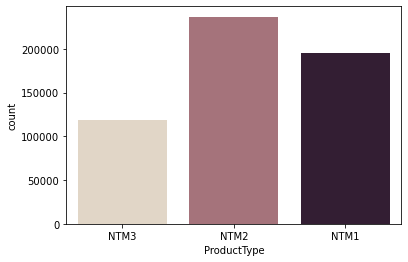

In [16]:
sns.countplot(data=train_df,x=feature_columns[0],palette="ch:.25")

<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

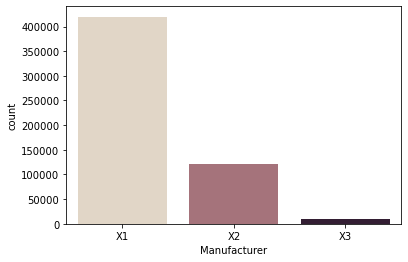

In [17]:
sns.countplot(data=train_df,x=feature_columns[1],palette="ch:.25")

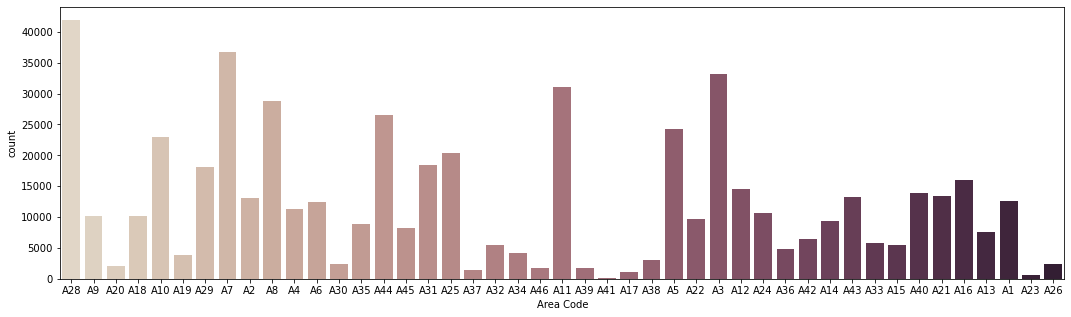

In [18]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(data=train_df,x=feature_columns[2],palette="ch:.25")
plt.show()

<AxesSubplot:xlabel='Sourcing Channel', ylabel='count'>

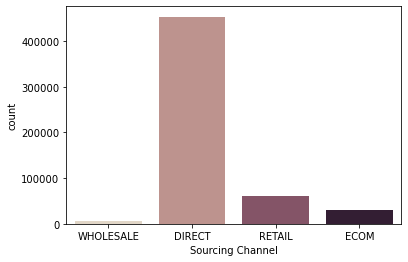

In [19]:
sns.countplot(data=train_df,x=feature_columns[3],palette="ch:.25")

<AxesSubplot:xlabel='Product Size', ylabel='count'>

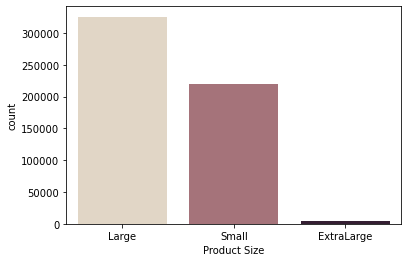

In [20]:
sns.countplot(data=train_df,x=feature_columns[4],palette="ch:.26")

<AxesSubplot:xlabel='Product Type', ylabel='count'>

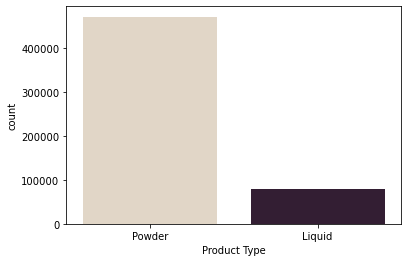

In [21]:
sns.countplot(data=train_df,x=feature_columns[5],palette="ch:.25")

<AxesSubplot:xlabel='Month of Sourcing', ylabel='count'>

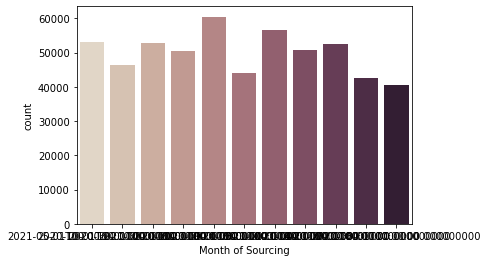

In [22]:
sns.countplot(data=train_df,x=feature_columns[6],palette="ch:.25")

In [23]:
train_df["Day"] = train_df['Month of Sourcing'].map(lambda x: x.day)
train_df["Month"] = train_df['Month of Sourcing'].map(lambda x: x.month)
train_df["Year"] = train_df['Month of Sourcing'].map(lambda x: x.year)
train_df.drop(columns=['Month of Sourcing'],inplace=True)

In [24]:
train_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Day,Month,Year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,10.158,1,5,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,134.281,1,10,2020
2,NTM3,X2,A20,DIRECT,Large,Powder,12.456,1,12,2020
3,NTM3,X1,A18,WHOLESALE,Small,Powder,107.220,1,2,2021
4,NTM2,X1,A28,DIRECT,Large,Liquid,197.763,1,11,2020


In [25]:
train_df.sample(5)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Day,Month,Year
20673,NTM1,X1,A34,DIRECT,Small,Powder,93.967,1,4,2021
55244,NTM2,X1,A2,DIRECT,Large,Powder,173.443,1,1,2021
255247,NTM3,X1,A14,DIRECT,Large,Liquid,72.559,1,10,2020
2665,NTM2,X1,A19,DIRECT,Large,Powder,111.425,1,2,2021
144311,NTM1,X2,A43,DIRECT,Small,Powder,168.424,1,2,2021


<AxesSubplot:xlabel='ProductType', ylabel='count'>

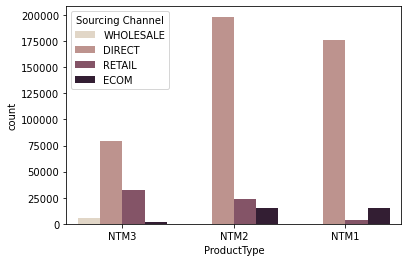

In [26]:
#sourcing channels of the product types
sns.countplot(data=train_df,x=feature_columns[0],hue='Sourcing Channel',palette="ch:.25")

<AxesSubplot:xlabel='ProductType', ylabel='count'>

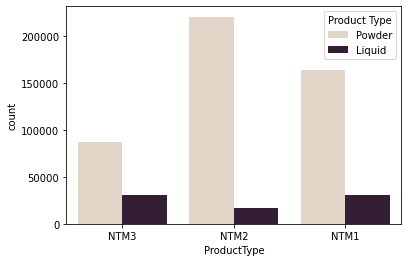

In [27]:
# Product Type categories comes under with ProductType code
sns.countplot(data=train_df,x=feature_columns[0],hue='Product Type',palette="ch:.25")

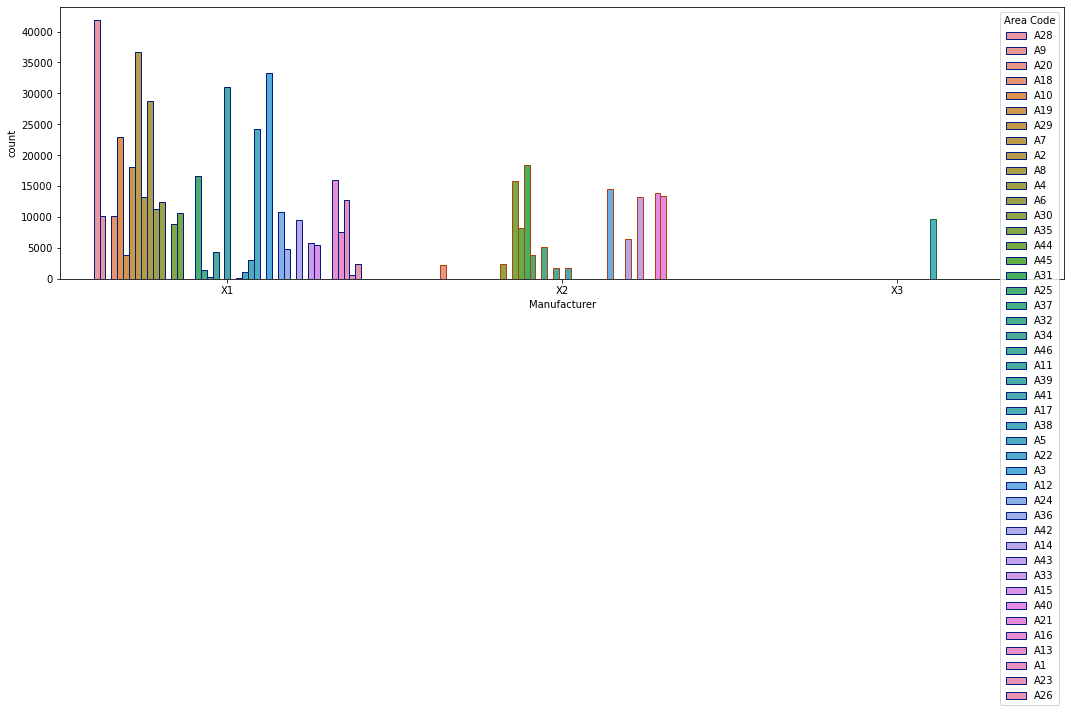

In [28]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(data=train_df,x=feature_columns[1],hue='Area Code',edgecolor=sns.color_palette("dark", 3),)
plt.show()

<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

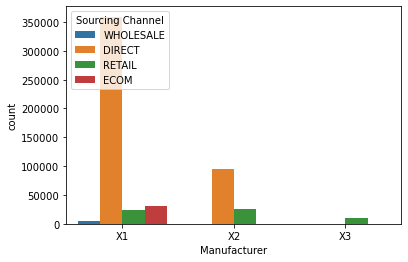

In [29]:
sns.countplot(data=train_df,x=feature_columns[1],hue='Sourcing Channel')

<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

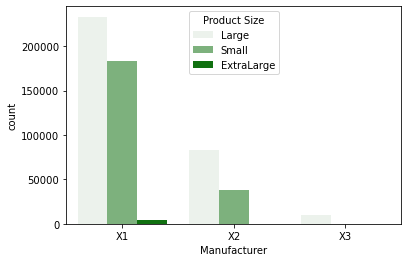

In [30]:
sns.countplot(data=train_df,x=feature_columns[1],hue='Product Size',color='green')

<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

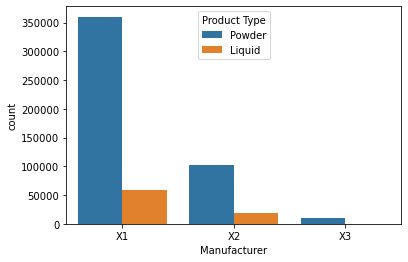

In [31]:
sns.countplot(data=train_df,x=feature_columns[1],hue='Product Type',palette=sns.color_palette("tab10"))

<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

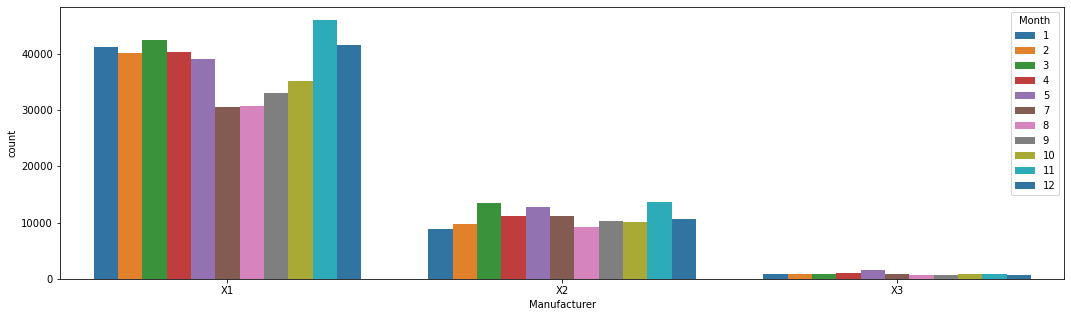

In [32]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(data=train_df,x=feature_columns[1],hue='Month',palette=sns.color_palette("tab10"))

<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

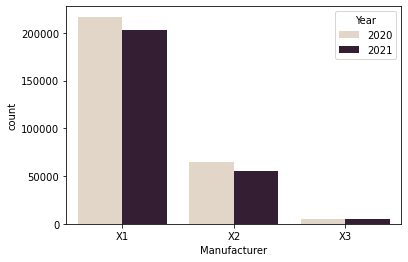

In [33]:
sns.countplot(data=train_df,x=feature_columns[1],hue='Year',palette="ch:.25")

<AxesSubplot:xlabel='Sourcing Channel', ylabel='count'>

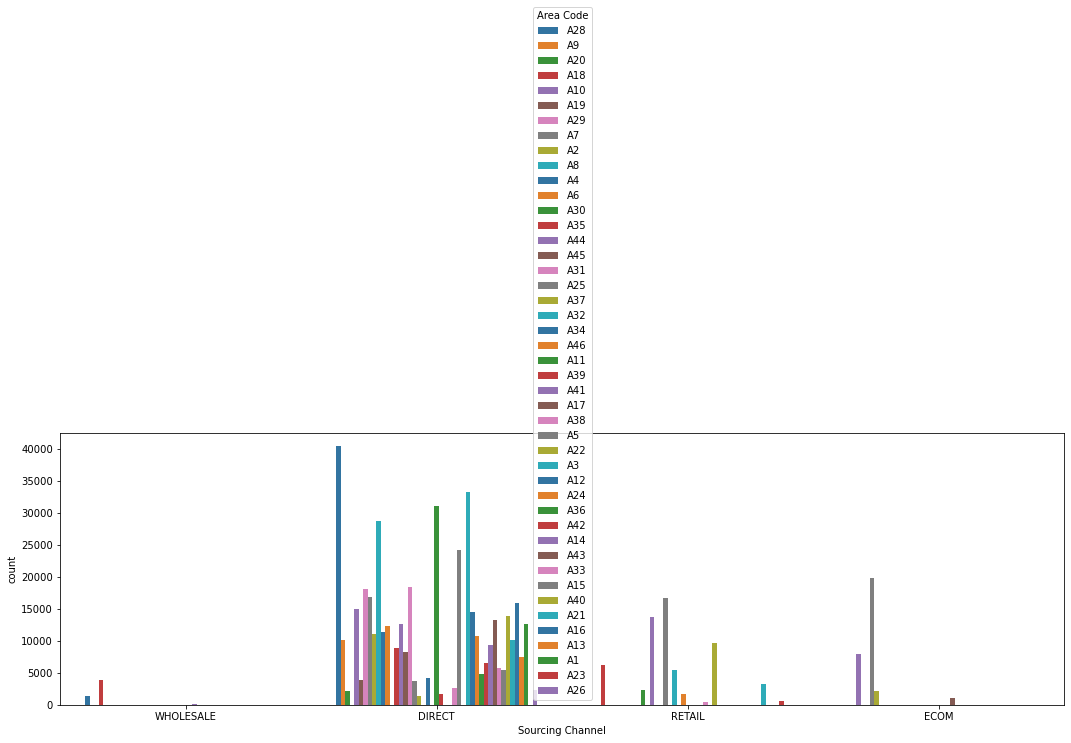

In [34]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(data=train_df,x=feature_columns[3],hue='Area Code',palette=sns.color_palette("tab10"))

<AxesSubplot:xlabel='Sourcing Channel', ylabel='count'>

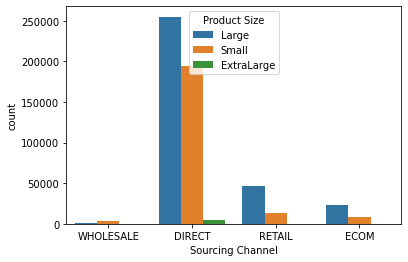

In [35]:
sns.countplot(data=train_df,x=feature_columns[3],hue='Product Size',palette=sns.color_palette("tab10"))

<AxesSubplot:xlabel='Sourcing Channel', ylabel='count'>

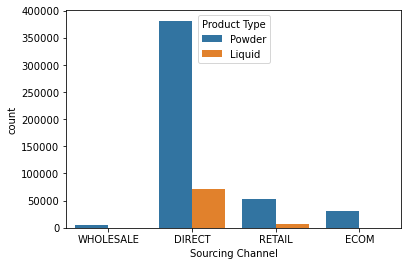

In [36]:
sns.countplot(data=train_df,x=feature_columns[3],hue='Product Type',palette=sns.color_palette("tab10"))

<AxesSubplot:xlabel='Sourcing Channel', ylabel='count'>

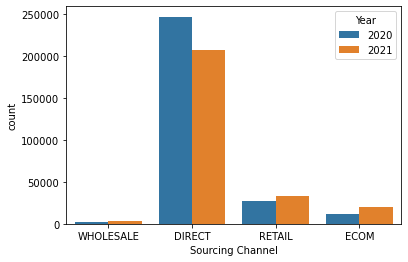

In [37]:
sns.countplot(data=train_df,x=feature_columns[3],hue='Year',palette=sns.color_palette("tab10"))

<AxesSubplot:xlabel='Product Size', ylabel='count'>

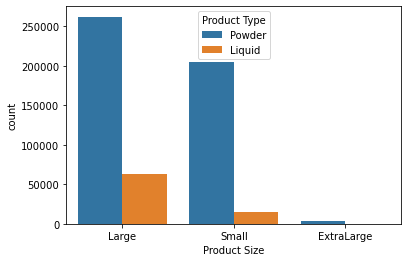

In [38]:
sns.countplot(data=train_df,x=feature_columns[4],hue='Product Type',palette=sns.color_palette("tab10"))

## Data Preprocessing

In [39]:
parameters = list(train_df.columns)
parameters.remove('Sourcing Cost')

In [40]:
for i in parameters:
    print(i+" : "+str(train_df[i].nunique()))

ProductType : 3
Manufacturer : 3
Area Code : 45
Sourcing Channel : 4
Product Size : 3
Product Type : 2
Day : 1
Month : 11
Year : 2


In [41]:
train_data = train_df #copy train dataframe to another variable

In [42]:
train_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Day,Month,Year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,10.158,1,5,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,134.281,1,10,2020
2,NTM3,X2,A20,DIRECT,Large,Powder,12.456,1,12,2020
3,NTM3,X1,A18,WHOLESALE,Small,Powder,107.220,1,2,2021
4,NTM2,X1,A28,DIRECT,Large,Liquid,197.763,1,11,2020
...,...,...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,136.469,1,7,2020
550172,NTM3,X1,A14,DIRECT,Large,Liquid,72.559,1,10,2020
550173,NTM2,X1,A5,DIRECT,Small,Powder,147.639,1,3,2021
550174,NTM2,X1,A7,DIRECT,Small,Powder,150.044,1,2,2021


In [43]:
# label_encoder object
# label_encoder = preprocessing.LabelEncoder()  
# train_data['Area Code']= label_encoder.fit_transform(train_data['Area Code'])
train_AreaCode = []
for i in range(train_data.shape[0]):
    train_AreaCode.append(int(train_data['Area Code'][i][1:]))

train_data['AreaCode'] = train_AreaCode

# One hot encoding for other categorical columns
temp1 = pd.get_dummies(train_data['ProductType'],drop_first=True)
temp2 = pd.get_dummies(train_data['Manufacturer'],drop_first=True)
temp3 = pd.get_dummies(train_data['Sourcing Channel'],drop_first=True)
temp4 = pd.get_dummies(train_data['Product Size'],drop_first=True)
temp5 = pd.get_dummies(train_data['Product Type'],drop_first=True)
temp6 = pd.get_dummies(train_data['Year'],prefix='Year',drop_first=True)

# Removing Date column as it has no variance
train_data = train_data.drop(columns=['Day'])

In [44]:
# Drop column as it is now encoded
train_data = train_data.drop(columns=['ProductType','Manufacturer','Area Code','Sourcing Channel','Product Size','Product Type','Year'])
# Join the encoded df
train_data = pd.concat([train_data,temp1,temp2,temp3,temp4,temp5,temp6],axis=1)

In [45]:
train_data

,Sourcing Cost,Month,AreaCode,NTM2,NTM3,X2,X3,ECOM,RETAIL,WHOLESALE,Large,Small,Powder,Year_2021
0,10.158,5,28,0,1,0,0,0,0,1,1,0,1,1
1,134.281,10,9,1,0,0,0,0,0,0,1,0,1,0
2,12.456,12,20,0,1,1,0,0,0,0,1,0,1,0
3,107.220,2,18,0,1,0,0,0,0,1,0,1,1,1
4,197.763,11,28,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550171,136.469,7,5,1,0,0,0,0,0,0,1,0,1,0
550172,72.559,10,14,0,1,0,0,0,0,0,1,0,0,0
550173,147.639,3,5,1,0,0,0,0,0,0,0,1,1,1
550174,150.044,2,7,1,0,0,0,0,0,0,0,1,1,1


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Sourcing Cost  550176 non-null  float64
 1   Month          550176 non-null  int64  
 2   AreaCode       550176 non-null  int64  
 3   NTM2           550176 non-null  uint8  
 4   NTM3           550176 non-null  uint8  
 5   X2             550176 non-null  uint8  
 6   X3             550176 non-null  uint8  
 7   ECOM           550176 non-null  uint8  
 8   RETAIL         550176 non-null  uint8  
 9   WHOLESALE      550176 non-null  uint8  
 10  Large          550176 non-null  uint8  
 11  Small          550176 non-null  uint8  
 12  Powder         550176 non-null  uint8  
 13  Year_2021      550176 non-null  uint8  
dtypes: float64(1), int64(2), uint8(11)
memory usage: 18.4 MB


## Outlier Indentification 

In [47]:
input_train_data = train_data.drop('Sourcing Cost',axis=1)
output_train_data = train_data['Sourcing Cost']

In [48]:
input_train_data.columns

Index(['Month', 'AreaCode', 'NTM2', 'NTM3', 'X2', 'X3', 'ECOM', 'RETAIL',
       'WHOLESALE', 'Large', 'Small', 'Powder', 'Year_2021'],
      dtype='object')

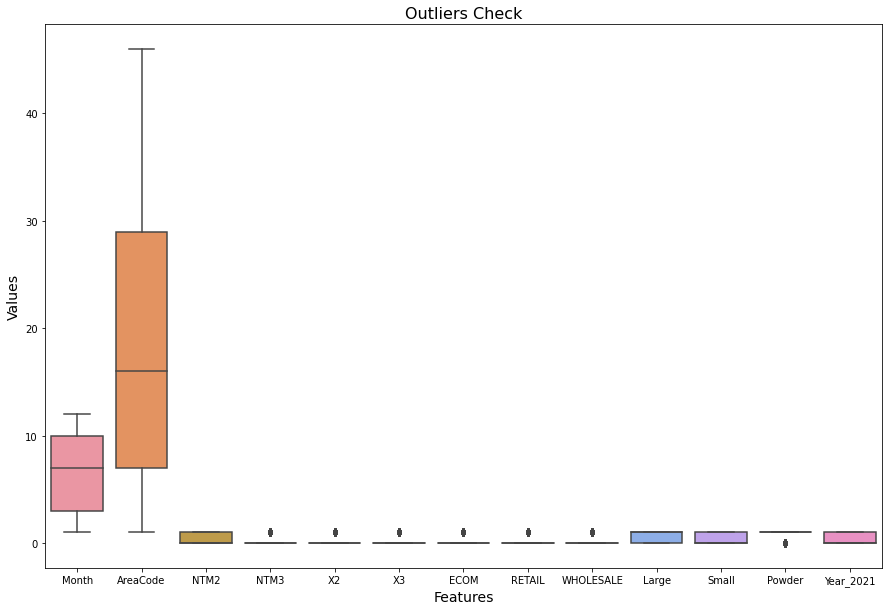

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(input_train_data))
boxplot.axes.set_title("Outliers Check", fontsize=16)
boxplot.set_xlabel("Features", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

Find outlier in Sourcing Cost 

C:\Users\Rishabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sourcing Cost'>

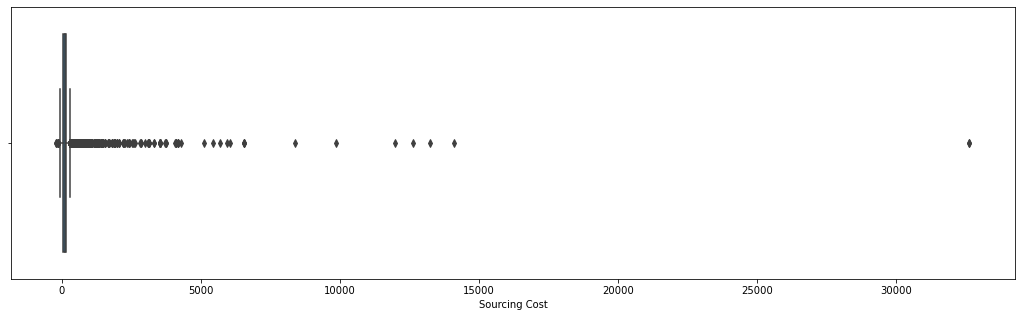

In [50]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(train_data['Sourcing Cost'])

In [51]:
Q1 = train_data['Sourcing Cost'].quantile(0.25)
Q3 = train_data['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (train_data['Sourcing Cost'] >= Q1 - 1.5 * IQR) & (train_data['Sourcing Cost'] <= Q3 + 1.5 *IQR)
train_data = train_data.loc[filter]

In [52]:
train_data = train_data.reset_index(drop=True)

C:\Users\Rishabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sourcing Cost'>

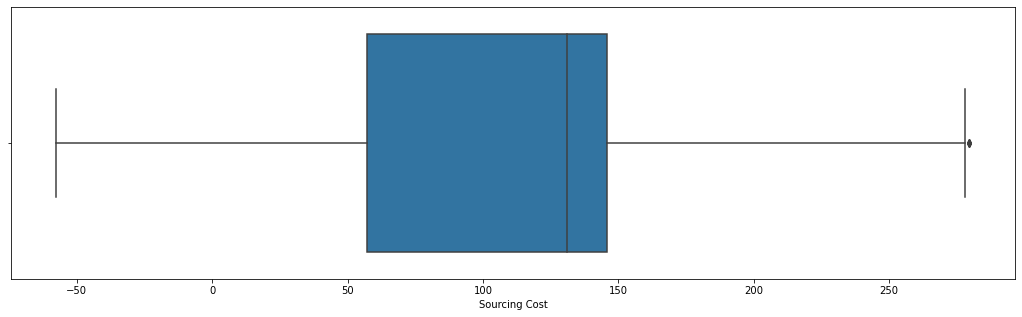

In [53]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(train_data['Sourcing Cost'])

In [54]:
#Negative cost was removed
train_data = train_data[train_data['Sourcing Cost']>0.1]

In [55]:
train_data = train_data.reset_index(drop=True)
train_data

,Sourcing Cost,Month,AreaCode,NTM2,NTM3,X2,X3,ECOM,RETAIL,WHOLESALE,Large,Small,Powder,Year_2021
0,10.158,5,28,0,1,0,0,0,0,1,1,0,1,1
1,134.281,10,9,1,0,0,0,0,0,0,1,0,1,0
2,12.456,12,20,0,1,1,0,0,0,0,1,0,1,0
3,107.220,2,18,0,1,0,0,0,0,1,0,1,1,1
4,197.763,11,28,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531510,136.469,7,5,1,0,0,0,0,0,0,1,0,1,0
531511,72.559,10,14,0,1,0,0,0,0,0,1,0,0,0
531512,147.639,3,5,1,0,0,0,0,0,0,0,1,1,1
531513,150.044,2,7,1,0,0,0,0,0,0,0,1,1,1


### Correlation Matrix of all Columns 

<AxesSubplot:>

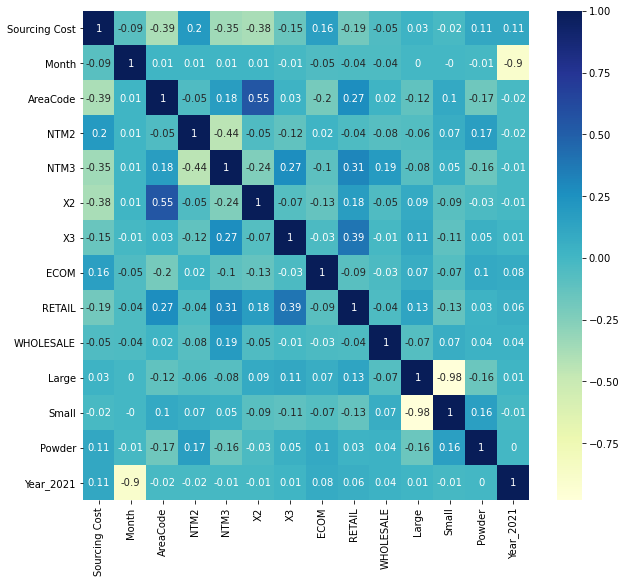

In [56]:
fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(np.round(train_data.corr(),2), cmap="YlGnBu", annot=True)

# Data Splitting and Model Training

In [57]:
X = train_data.drop(columns=['Sourcing Cost'])
y = train_data['Sourcing Cost']

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(372060, 13)
(159455, 13)
(372060,)
(159455,)


### Linear Regression 

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_test)

In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2-Score : ",r2_score(y_test,y_pred))

MAE :  30.32236805207387
RMSE :  42.187642655896894
R2-Score :  0.37829004436687963


In [63]:
np.round(y_test,2)

515031    197.22
117694    143.92
457233     23.04
269176    107.54
115085    141.91
           ...  
149936     54.55
346337    102.60
136303     79.61
491440    113.56
162006     95.87
Name: Sourcing Cost, Length: 159455, dtype: float64

In [64]:
np.round(y_pred,2)

array([129.43, 135.91,  80.09, ...,  77.05, 134.28, 134.92])

### Polynomial Regression 

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
polyreg = PolynomialFeatures(degree=3)

In [67]:
X_train_transformed = polyreg.fit_transform(X_train)
X_test_transformed = polyreg.fit_transform(X_test)

In [68]:
pr = LinearRegression()
pr.fit(X_train_transformed,y_train)

LinearRegression()

In [69]:
y_pred_pr = pr.predict(X_test_transformed)

In [70]:
print("MAE : ",mean_absolute_error(y_test,y_pred_pr))
print("RMSE : ", np.sqrt(mean_squared_error(y_test,y_pred_pr)))
print("R2-Score : ",r2_score(y_test,y_pred_pr))

MAE :  15.64587738426169
RMSE :  25.924634069801574
R2-Score :  0.7652300138146404


In [71]:
np.round(y_test,2)

515031    197.22
117694    143.92
457233     23.04
269176    107.54
115085    141.91
           ...  
149936     54.55
346337    102.60
136303     79.61
491440    113.56
162006     95.87
Name: Sourcing Cost, Length: 159455, dtype: float64

In [72]:
np.round(y_pred_pr,2)

array([132.73, 160.23,  35.75, ...,  84.05, 111.06, 113.58])

### XGBoost Regression 

In [73]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 13)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
xgb_pred = xgb_r.predict(X_test)

[03:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [74]:
print("MAE : ",mean_absolute_error(y_test,xgb_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test,xgb_pred)))
print("R2-Score : ",r2_score(y_test,xgb_pred))

MAE :  10.497412999842348
RMSE :  19.59062621159242
R2-Score :  0.865935454185211


In [75]:
[[y_test,xgb_pred]]

[[515031    197.217
  117694    143.919
  457233     23.040
  269176    107.540
  115085    141.906
             ...   
  149936     54.546
  346337    102.600
  136303     79.612
  491440    113.563
  162006     95.870
  Name: Sourcing Cost, Length: 159455, dtype: float64,
  array([192.171   , 145.34755 ,  33.860867, ...,  77.86499 ,  91.48082 ,
         103.61974 ], dtype=float32)]]

### Random Forest Regression 

In [76]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
rf_regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [77]:
rf_pred = rf_regressor.predict(X_test)

In [78]:
print("MAE : ",mean_absolute_error(y_test,rf_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test,rf_pred)))
print("R2-Score : ",r2_score(y_test,rf_pred))

MAE :  8.3126721206112
RMSE :  17.729671161328415
R2-Score :  0.890195872406088


In [79]:
[[y_test,rf_pred]]

[[515031    197.217
  117694    143.919
  457233     23.040
  269176    107.540
  115085    141.906
             ...   
  149936     54.546
  346337    102.600
  136303     79.612
  491440    113.563
  162006     95.870
  Name: Sourcing Cost, Length: 159455, dtype: float64,
  array([198.27725063, 143.28620624,  32.90105211, ...,  80.12163744,
          92.66784079,  97.79547099])]]

# Final prediction on Real Testing Dataset

In [80]:
test_data = test_df

In [81]:
test_data['Area Code'] = test_data['Area Code'].astype('str') 

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ProductType        96 non-null     object        
 1   Manufacturer       96 non-null     object        
 2   Area Code          96 non-null     object        
 3   Sourcing Channel   96 non-null     object        
 4   Product Size       96 non-null     object        
 5   Product Type       96 non-null     object        
 6   Month of Sourcing  96 non-null     datetime64[ns]
 7   Sourcing Cost      96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 6.1+ KB


In [83]:
test_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-21,32.32


### Data pre-processing for testing dataset 

In [84]:
test_data["Day"] = test_data['Month of Sourcing'].map(lambda x: x.day)
test_data["Month"] = test_data['Month of Sourcing'].map(lambda x: x.month)
test_data["Year"] = test_data['Month of Sourcing'].map(lambda x: x.year)
test_data.drop(columns=['Month of Sourcing'],inplace=True)

In [85]:
# label_encoder object
test_AreaCode = []
for i in range(test_data.shape[0]):
    test_AreaCode.append(int(test_data['Area Code'][i][1:]))
    
test_data['AreaCode'] = test_AreaCode

# One hot encoding for other categorical columns
temp1_ = pd.get_dummies(test_data['ProductType'],drop_first=True)
temp2_ = pd.get_dummies(test_data['Manufacturer'],drop_first=True)
temp3_ = pd.get_dummies(test_data['Sourcing Channel'],drop_first=True)
temp4_ = pd.get_dummies(test_data['Product Size'],drop_first=True)
temp5_ = pd.get_dummies(test_data['Product Type'],drop_first=True)
temp6_ = pd.get_dummies(test_data['Year'],prefix='Year',drop_first=True)

# Removing Date column as it has no variance
test_data = test_data.drop(columns=['Day'])

In [86]:
# Drop column as it is now encoded
test_data = test_data.drop(columns=['ProductType','Manufacturer','Area Code','Sourcing Channel','Product Size','Product Type','Year'])
# Join the encoded df
test_data = pd.concat([test_data,temp1_,temp2_,temp3_,temp4_,temp5_,temp6_],axis=1)

In [87]:
test_data

,Sourcing Cost,Month,AreaCode,NTM2,NTM3,X2,X3,ECOM,RETAIL,WHOLESALE,Large,Small,Powder
0,103.68,6,1,0,0,0,0,0,0,0,0,1,1
1,155.75,6,10,0,0,0,0,0,0,0,1,0,1
2,143.02,6,10,0,0,0,0,1,0,0,1,0,1
3,139.39,6,11,0,0,0,0,0,0,0,1,0,1
4,169.42,6,2,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,89.57,6,44,0,1,0,0,0,0,0,0,1,0
92,114.57,6,8,0,1,0,0,0,0,0,1,0,1
93,111.26,6,8,0,1,0,0,0,0,0,0,1,1
94,32.32,6,20,0,1,1,0,0,0,0,1,0,1


In [88]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sourcing Cost  96 non-null     float64
 1   Month          96 non-null     int64  
 2   AreaCode       96 non-null     int64  
 3   NTM2           96 non-null     uint8  
 4   NTM3           96 non-null     uint8  
 5   X2             96 non-null     uint8  
 6   X3             96 non-null     uint8  
 7   ECOM           96 non-null     uint8  
 8   RETAIL         96 non-null     uint8  
 9   WHOLESALE      96 non-null     uint8  
 10  Large          96 non-null     uint8  
 11  Small          96 non-null     uint8  
 12  Powder         96 non-null     uint8  
dtypes: float64(1), int64(2), uint8(10)
memory usage: 3.3 KB


In [89]:
test_data['Year_2021'] = np.ones(test_data.shape[0])
test_X = test_data.drop('Sourcing Cost',axis=1)

In [90]:
test_X

,Month,AreaCode,NTM2,NTM3,X2,X3,ECOM,RETAIL,WHOLESALE,Large,Small,Powder,Year_2021
0,6,1,0,0,0,0,0,0,0,0,1,1,1.0
1,6,10,0,0,0,0,0,0,0,1,0,1,1.0
2,6,10,0,0,0,0,1,0,0,1,0,1,1.0
3,6,11,0,0,0,0,0,0,0,1,0,1,1.0
4,6,2,0,0,0,0,0,0,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,6,44,0,1,0,0,0,0,0,0,1,0,1.0
92,6,8,0,1,0,0,0,0,0,1,0,1,1.0
93,6,8,0,1,0,0,0,0,0,0,1,1,1.0
94,6,20,0,1,1,0,0,0,0,1,0,1,1.0


### Test data were predicted with the trained model

In [91]:
#prediction using Linear Regression Model

lr_test_y = lr.predict(test_X)

#prediction using Polynomial Regression Model

test_X_transformed = polyreg.fit_transform(test_X)
pr_test_y = pr.predict(test_X_transformed)

#prediction using XGBoost Regression Model

xgb_test_y = xgb_r.predict(test_X)

#prediction using Random Forest Regression Model

rf_test_y = rf_regressor.predict(test_X)

In [92]:
test_y = test_data['Sourcing Cost']

In [93]:
print("##################################################################################")
print("##################   Original Test Data Prediction Metrics   #####################")
print("##################################################################################")

print('\n')

print("*** Linear Regression Metrics ***")
print("MAE : ",mean_absolute_error(test_y,lr_test_y))
print("RMSE : ", np.sqrt(mean_squared_error(test_y,lr_test_y)))
print("R2-Score : ",r2_score(test_y,lr_test_y))
      
print('\n')
      
print("*** Polynomial Regression Metrics ***")
print("MAE : ",mean_absolute_error(test_y,pr_test_y))
print("RMSE : ", np.sqrt(mean_squared_error(test_y,pr_test_y)))
print("R2-Score : ",r2_score(test_y,pr_test_y))
      
print('\n')

print("*** XGBoost Regression Metrics ***")
print("MAE : ",mean_absolute_error(test_y,xgb_test_y))
print("RMSE : ", np.sqrt(mean_squared_error(test_y,xgb_test_y)))
print("R2-Score : ",r2_score(test_y,xgb_test_y))
      
print('\n')
      
print("*** Random Forest Regression Metrics ***")
print("MAE : ",mean_absolute_error(test_y,rf_test_y))
print("RMSE : ", np.sqrt(mean_squared_error(test_y,rf_test_y)))
print("R2-Score : ",r2_score(test_y,rf_test_y))
      

##################################################################################
##################   Original Test Data Prediction Metrics   #####################
##################################################################################


*** Linear Regression Metrics ***
MAE :  33.47862324859698
RMSE :  46.83262813775938
R2-Score :  0.19154849252293193


*** Polynomial Regression Metrics ***
MAE :  23.967722954029536
RMSE :  40.88637009880879
R2-Score :  0.3838108795415017


*** XGBoost Regression Metrics ***
MAE :  18.213098292350768
RMSE :  32.353094937419186
R2-Score :  0.6141765862323987


*** Random Forest Regression Metrics ***
MAE :  16.306044506024374
RMSE :  32.39163370233419
R2-Score :  0.6132568588378158


For training dataset the Random forest Regression peformed quite well but for Testing dataset both XGBoost and Random Forest given almost same metric results, but we selected XGBoost for better R2 score

In [94]:
Test_Data_Actual_Prediction = pd.DataFrame()

Test_Data_Actual_Prediction['Actual'] = test_y
Test_Data_Actual_Prediction['Predicted'] = xgb_test_y 

In [95]:
Test_Data_Actual_Prediction

,Actual,Predicted
0,103.68,108.008316
1,155.75,136.563873
2,143.02,136.386398
3,139.39,135.985367
4,169.42,156.246613
...,...,...
91,89.57,62.239365
92,114.57,124.088844
93,111.26,116.219292
94,32.32,64.566299
